In [1]:
from h3ds.dataset import H3DS
import numpy as np
from tempfile import TemporaryFile
import trimesh
import copy
from ipywidgets import interact, interactive, widgets, fixed
from h3ds.mesh import Mesh
#from vtkplotter import *

h3ds = H3DS(path='h3ds_v0.2')

#h3ds.download(token= 4ce4d22168adeeefe6a1ec1d738fac4d) # This is currenly not working so please downlad the data manually
#mesh, images, masks, cameras = h3ds.load_scene(scene_id='1b2a8613401e42a8')

In [71]:
scene_id = '868765907f66fd85'
view = '16'

In [72]:
#mesh_pred_path = 'idr_eval_results/reconstructions/idr/3b5a2eb92a501d54_3.ply'
mesh_pred_path = 'idr_eval_results/reconstructions/idr/' + scene_id + '_' + view + '.ply'
#print(mesh_pred_path)
#mesh_gt_path = 'h3ds_v0.2/3b5a2eb92a501d54/full_head.obj'
#mesh_SWC_path = 'surface_world_coordinates_2000.ply'

#mesh_pred = trimesh.load(mesh_pred_path, process=False)
mesh_pred = Mesh().load(mesh_pred_path)

#mesh_gt = trimesh.load(mesh_gt_path, process=False)
#mesh_gt, images, masks, cameras, _ = h3ds.load_scene('3b5a2eb92a501d54', '3')
mesh_gt, images, masks, cameras, _ = h3ds.load_scene(scene_id, view)
#mesh_SWC = trimesh.load(mesh_SWC_path, process=False)

In [73]:
#print(mesh_pred.centroid)
#print(mesh_gt.centroid)
#print(mesh_gt.extents)

#print(mesh_pred.bounding_box.extents)

#print(mesh_gt.vertices)

vertices = mesh_gt.vertices
vertices_pred = mesh_pred.vertices



print(vertices)
print(vertices_pred)

#pc_gt = Points(mesh_gt.vertices, r=10)


[[  86.1628876    32.6454544    92.1060791 ]
 [  67.2905121   237.417343   -115.662018  ]
 [   5.88788509  -65.6398087    96.4292374 ]
 ...
 [-123.352242    -62.0110016    -5.14469814]
 [  69.7247696    82.5522995    27.9303322 ]
 [  96.2960434    33.8071136   -10.7736177 ]]
[[  45.72878265   52.56632233  -95.31800079]
 [ 272.78375244  190.54786682   90.7488327 ]
 [ -89.86610413  411.37411499 -265.4810791 ]
 ...
 [ 132.75765991  -32.24470901    9.47884369]
 [-229.89219666  189.88430786  133.86540222]
 [-319.75704956  458.97171021   36.00634384]]


In [74]:
closest_vert_right_eye = vertices_pred[0]
closest_vert_left_eye = vertices_pred[0]
closest_vert_nose_base = vertices_pred[0]
closest_vert_right_lips = vertices_pred[0]
closest_vert_left_lips = vertices_pred[0]
closest_vert_nose_tip = vertices_pred[0]

closest_vert = [closest_vert_right_eye, 
                closest_vert_left_eye, 
                closest_vert_nose_base, 
                closest_vert_right_lips, 
                closest_vert_left_lips,
                closest_vert_nose_tip]

#print(closest_vert)
#168f8ca5c2dce5bc
#right_eye = [-64.928, -103.996, 552.295]
#left_eye = [-37.282, -105.554, 563.712]
#nose_base = [-47.800, -34.497, 542.937]
#right_lips = [-84.489, 6.352, 558.372]
#left_lips = [-13.259, 8.071, 561.263]
#nose_tip = [-48.228, -65.305, 560.791]

#7dd427509fe84baa_32
#right_eye = []
#left_eye = []
#nose_base = []
#right_lips = []
#left_lips = []
#nose_tip = []

#1b2a8613401e42a8_32
#right_eye = [-19.820, -32.081, -95.198]
#left_eye = [17.733, -35.211, -94.272]
#nose_base = [-2.217, 14.079, -113.702]
#right_lips = [-25.297, 32.855, -102.144]
#left_lips = [22.428, 33.638, -100.588]
#nose_tip = [-1.435, -2.742, -131.073]

#609cc60fd416e187_32
#right_eye = [-16.530, -30.722, -89.802]
#left_eye = [20.720, -30.001,  -87.447]
#nose_base = [0.304, 20.138, -110.146]
#right_lips = [-20.828, 38.404, -98.572]
#left_lips = [27.883, 36.972, -94.766]
#nose_tip = [2.811, 0.797, -123.518]

#868765907f66fd85_32
right_eye = [-16.173, -35.793, -98.171]
left_eye = [14.203, -35.377, -95.532]
nose_base = [-1.193, 10.396, -114.209]
right_lips = [-24.079, 37.443, -102.910]
left_lips = [27.519, 39.107, -101.903]
nose_tip = [-2.441, -7.081, -128.065]



landmarks = [right_eye, left_eye, nose_base, right_lips, left_lips, nose_tip]


print(landmarks)
print(closest_vert[0])

[[-16.173, -35.793, -98.171], [14.203, -35.377, -95.532], [-1.193, 10.396, -114.209], [-24.079, 37.443, -102.91], [27.519, 39.107, -101.903], [-2.441, -7.081, -128.065]]
[ 45.72878265  52.56632233 -95.31800079]


In [75]:
closest_loss = []

for idx, vertex in enumerate(closest_vert):
    closest_loss.append(abs(vertex[0] - landmarks[idx][0]) + abs(vertex[1] - landmarks[idx][1]) + abs(vertex[2] - landmarks[idx][2]))

#print(closest_loss)
#closest_loss_right_eye = abs(closest_vert_right_eye[0] - right_eye[0]) + abs(closest_vert_right_eye[1] - right_eye[1]) + abs(closest_vert_right_eye[2] - right_eye[2])
#closest_loss_left_eye = abs(closest_vert_left_eye[0] - left_eye[0]) + abs(closest_vert_left_eye[1] - left_eye[1]) + abs(closest_vert_left_eye[2] - left_eye[2])


#print(closest_loss)
landmarks_idx = [0, 0, 0, 0, 0, 0]
#right_eye_idx = 0
for idx_1, landmark in enumerate(landmarks):
    for idx, vert in enumerate(vertices_pred):
        loss = abs(vert[0] - landmark[0]) + abs(vert[1] - landmark[1]) + abs(vert[2] - landmark[2])
        if loss < closest_loss[idx_1]:
            closest_vert[idx_1] = vert
            closest_loss[idx_1] = loss
            landmarks_idx[idx_1] = idx
        

        
print(closest_loss)

print(landmarks_idx)
#print(right_eye_idx)
#print("Closest_vert: ",closest_vert)

#right_eye_idx = np.where(vertices_pred == closest_vert)
#print(vertices_pred[right_eye_idx])


    

[1.0025774230956976, 3.1545617980957097, 3.528760475158689, 1.4447738342285206, 0.6205056152343715, 1.2608985729217554]
[791647, 862747, 166540, 542767, 912362, 477693]


In [76]:
lines = landmarks_idx
keys = landmarks = ['right_eye', 'left_eye', 'nose_base', 'right_lips', 'left_lips', 'nose_tip']

with open('idr_eval_results/reconstructions/idr/' + scene_id + '_' + 'landmarks' + '_' + view + '.txt', 'w') as f:
    for idx, line in enumerate(lines):
        f.write(keys[idx])
        f.write(' ')
        f.write(str(line))
        f.write('\n')

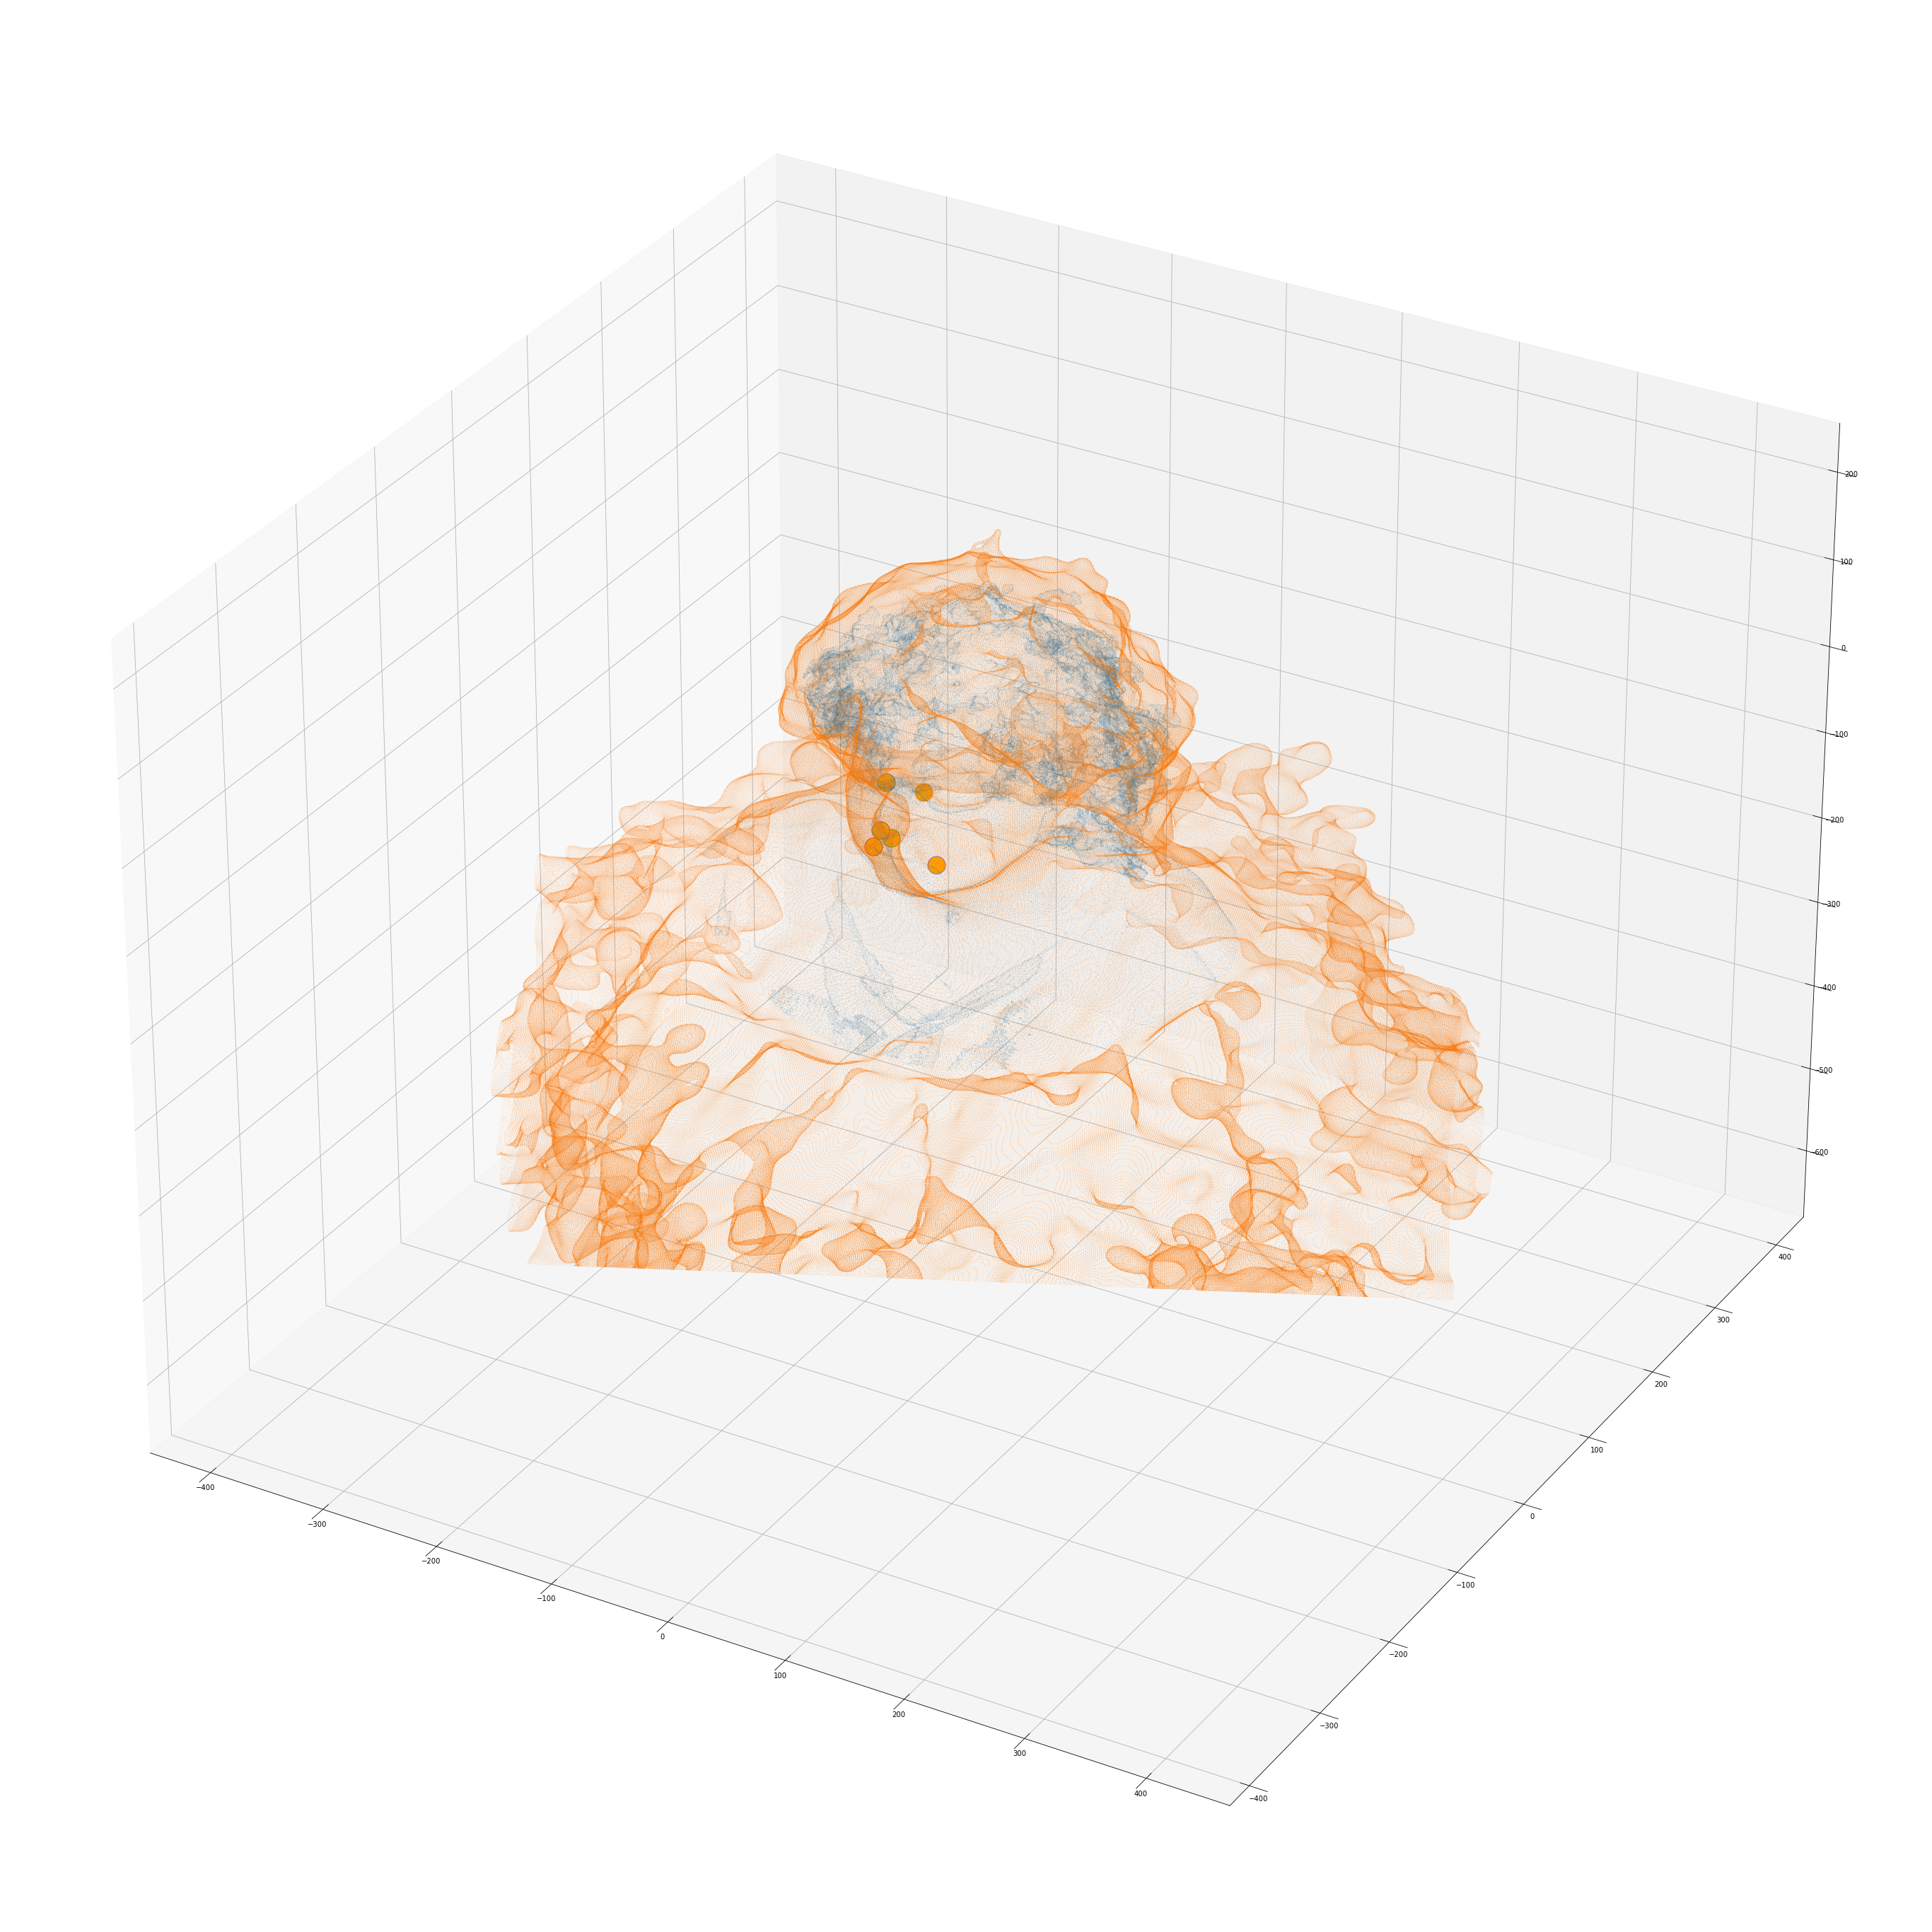

In [77]:
#%matplotlib widget
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(50,50))
ax = plt.axes(projection='3d')
#ay = plt.axes(projection='3d')
#ax = Axes3D(fig)
ax.scatter(vertices[:,0],vertices[:,2], -(vertices[:,1]), s=0.01)#, markerfacecolor="blue", markersize=0.01)
#ax.scatter(vertices[381,0], vertices[381,2], -vertices[381,1])
ax.scatter(vertices_pred[:,0],vertices_pred[:,2], -(vertices_pred[:,1]),  s=0.01)
#ax.plot3D(vertices[140857,0], vertices[140857,2], -vertices[140857,1], marker="o", markerfacecolor="yellow", markersize=25)
#ax.plot3D(vertices[669,0], vertices[669,2], -vertices[669,1], marker="o", markerfacecolor="yellow", markersize=25)
#ax.plot3D(vertices[52158,0], vertices[52158,2], -vertices[52158,1], marker="o", markerfacecolor="red", markersize=25)
#ax.plot3D(vertices[135155,0], vertices[135155,2], -vertices[135155,1], marker="o", markerfacecolor="red", markersize=25)
#ax.plot3D(vertices[1348,0], vertices[1348,2], -vertices[1348,1], marker="o", markerfacecolor="red", markersize=25)
#ax.plot3D(vertices[381,0], vertices[381,2], -vertices[381,1], marker="o", markerfacecolor="green", markersize=25)

for idx in landmarks_idx:
    ax.plot3D(vertices_pred[idx,0], vertices_pred[idx,2], -vertices_pred[idx,1], marker="o", markerfacecolor="orange", markersize=25)

#ax.plot(vertices[669][0], vertices[669][2], -vertices[669][1], marker="o", markerfacecolor="red", markersize=3)

plt.show()

#from open3d import * 


In [ ]:

#show((mesh_pred), axes=1)

In [ ]:
#mesh_gt.show()
mesh_SWC.show()

In [ ]:
#scale = mesh_pred.extents / mesh_gt.extents
#matrix = np.eye(4)
#matrix[:2, :2] /= scale[:2]
#mesh_pred_copy = copy.deepcopy(mesh_pred)

#mesh_pred_copy.apply_transform(matrix)

#print('\nafter operation\n')
#print(mesh_pred_copy.extents)
#print(mesh_gt.extents)

T, cost = trimesh.registration.mesh_other(mesh_pred, mesh_gt)

In [ ]:
#mesh_pred_copy.show()
#mesh_pred_trans.export('mesh_pred_trans.ply')

In [ ]:
print(T, cost)

In [ ]:
#T, cost = trimesh.registration.mesh_other(mesh_pred, mesh_gt)
matrix = np.eye(4)
P = mesh_gt.centroid - mesh_pred.centroid
matrix[:,3] = [0, P[1], P[2], 1]
print(matrix)
mesh_pred_copy = copy.deepcopy(mesh_pred)
mesh_pred_trans = mesh_pred_copy.apply_transform(matrix)

print(mesh_pred_trans)
#transformed_mesh = trimesh.transformations.

In [ ]:
#T, cost = trimesh.registration.mesh_other(mesh_pred_trans, mesh_gt)
#print(matrix)
#print(T)

print(mesh_pred_trans.centroid)
print(mesh_gt.centroid)

In [ ]:
#mesh_pred_trans = mesh_pred_trans.apply_transform(T)
#print(T, cost)

In [ ]:
#T, cost = trimesh.registration.mesh_other(mesh_pred_trans, mesh_gt)

In [ ]:
#print(T, cost)
#print(mesh_pred_trans.)

In [ ]:
#trimesh.exchange.export.export_mesh(mesh_pred_trans, 'mesh_pred_trans.ply')
mesh_pred_trans.export('mesh_pred_trans.ply')

In [ ]:
scenes = h3ds.scenes() # returns all the scenes ['1b2a8613401e42a8', ...]
scenes = h3ds.scenes(tags={'h3d-net'}) # returns the scenes used in H3D-Net paper

In [ ]:
views_configs = h3ds.default_views_configs(scene_id='1b2a8613401e42a8') # '3', '4', '8', '16' and '32'
mesh_3, images_3, masks_3, cameras_3 = h3ds.load_scene(scene_id='1b2a8613401e42a8', views_config_id='3')
mesh, images, masks, cameras = h3ds.load_scene(scene_id='1b2a8613401e42a8')




In [ ]:
#views_config_id=3

#print("This is the original loaded cameras.npz file with vc_id = 3: \n\n", cameras_3)

loaded_cameras = np.load('cameras.npz')

loaded_cameras.files

loaded_cameras['scale_mat_0']

#print("This is the original loaded cameras.npz \n\n", loaded_cameras)


#outfile = TemporaryFile()
#np.savez('cameras_reloaded', cameras)

#loaded_cameras_reloaded = np.load('cameras_reloaded.npz')
#loaded_cameras_3 = tuple(loaded_cameras_3.reshape(1, -1))
#final_loaded_cameras_3 = ()
#for idx in views_config_id:
#    final_loaded_cameras_3.append()



#print(" ")
#print(loaded_cameras_3)

#print(loaded_cameras.files)
#print(loaded_cameras_3.files[0])


In [ ]:
#mesh_pred, landmarks_pred = my_rec_method(images, masks, cameras)
chamfer, _, _, _ = h3ds.evaluate_scene('1b2a8613401e42a8', mesh_pred, landmarks_pred)

In [ ]:
import os
import argparse
import zipfile

import numpy as np
from tqdm import tqdm

from h3ds.dataset import H3DS
from h3ds.mesh import Mesh
from h3ds.log import logger
from h3ds.utils import error_to_color, download_file_from_google_drive, create_parent_directory, create_directory, remove


def method_file_id(method):
    if method == 'idr':
        return '1ReyXoGCfmcItHn9ClkwuyD_8mVYZ-BE2'
    elif method == 'h3d-net':
        return '1iwZ3cxJzq22zXb3hYL5DfcGWiEmOyjBW'
    else:
        raise ValueError(f'Method {method}')


def download_reconstructions(token, method, local_dir):

    method_dir = os.path.join(local_dir, method)
    method_zip = os.path.join(local_dir, f'{method}.zip')
    if os.path.exists(method_dir):
        logger.info(
            f'{method} reconstructions found at {method_dir} - Skipping download'
        )
        return method_dir
    else:
        logger.info(f'Downloading {method} results to {method_zip}')
        create_parent_directory(method_zip)
        download_file_from_google_drive(id=method_file_id(method),
                                        destination=method_zip)

    # Unzip file
    logger.info(f'Unzipping results file to {method_dir}')
    create_directory(method_dir)
    with zipfile.ZipFile(method_zip, 'r') as zip_ref:
        for member in tqdm(zip_ref.infolist(), desc='Extracting...'):
            zip_ref.extract(member, method_dir, pwd=token.encode('utf-8'))

    remove(method_zip)

    return method_dir


def main(h3ds_path, h3ds_token, method, output_dir):

    # Create instance of h3ds and download it if not available
    h3ds = H3DS(path=h3ds_path)
    h3ds.download(token=h3ds_token)

    # Download cached reconstruction results for selected method
    recs_dir = os.path.join(output_dir, 'reconstructions')
    method_dir = download_reconstructions(token=h3ds_token,
                                          method=method,
                                          local_dir=recs_dir)

    # Evaluate `method` on all the scenes used in the h3d-net paper and store the metric
    metrics_head = {}
    metrics_face = {}
    h3ds_scenes = h3ds.scenes(tags={'h3d-net'})
    eval_dir = os.path.join(output_dir, 'evaluation', method)

    for scene_id in h3ds_scenes:

        metrics_head[scene_id] = {}
        metrics_face[scene_id] = {}

        h3ds_views_configs = h3ds.default_views_configs(scene_id)
        for views_config_id in h3ds_views_configs:

            logger.info(
                f'Evaluating {method} reconstruction with {views_config_id} views from scene {scene_id}.'
            )

            # Get scene in millimiters
            mesh_gt, images, masks, cameras = h3ds.load_scene(
                scene_id, views_config_id)

            # Load predicted 3D reconstruction.
            mesh_pred = Mesh().load(
                os.path.join(method_dir, f'{scene_id}_{views_config_id}.ply'))
            landmarks_pred = None

            # Evaluate scene. The `landmarks_pred` are optional and, if provided, they will be used
            # for an initial alignment in the evaluation process. If not provided, it will be assumed
            # that the predicted mesh is already coarsely aligned with the ground truth mesh.
            chamfer_gt_pred, chamfer_pred_gt, mesh_gt, mesh_pred_aligned = \
                h3ds.evaluate_scene(scene_id, mesh_pred, landmarks_pred)

            metrics_head[scene_id][views_config_id] = np.mean(chamfer_gt_pred)
            logger.info(
                f' > Chamfer distance full head (mm): {metrics_head[scene_id][views_config_id]}'
            )
            mesh_gt.save(
                os.path.join(eval_dir, 'full_head',
                             f'{scene_id}_{views_config_id}_gt.obj'))

            # The chamfer computed from prediction to ground truth is only provided for
            # visualization purporses (i.e. heatmaps).
            mesh_pred_aligned.vertices_color = error_to_color(chamfer_pred_gt,
                                                              clipping_error=5)
            mesh_pred_aligned.save(
                os.path.join(eval_dir, 'full_head',
                             f'{scene_id}_{views_config_id}_pred.obj'))

            # Evaluate reconstruction in the facial region, defined by a sphere of radius 95mm centered
            # in the tip of the nose. In this case, a more fine alignment is performed, taking into account
            # only the vertices from this region. This evaluation should be used when assessing methods
            # that only reconstruct the frontal face area (i.e. Basel Face Bodel)
            chamfer_gt_pred, chamfer_pred_gt, mesh_gt_region, mesh_pred_aligned = \
                h3ds.evaluate_scene(scene_id, mesh_pred, landmarks_pred, region_id='face_sphere')

            # Note that in both cases we only report the chamfer distane computed from the ground truth
            # to the prediction, since here we have control over the region where the metric is computed.
            metrics_face[scene_id][views_config_id] = np.mean(chamfer_gt_pred)
            logger.info(
                f' > Chamfer distance face (mm): {metrics_face[scene_id][views_config_id]}'
            )
            mesh_gt_region.save(
                os.path.join(eval_dir, 'face_sphere',
                             f'{scene_id}_{views_config_id}_gt.obj'))

            # Again, the chamfer computed from prediction to ground truth is only provided for
            # visualization purporses (i.e. heatmaps).
            mesh_pred_aligned.vertices_color = error_to_color(chamfer_pred_gt,
                                                              clipping_error=5)

            # For improved visualization the predicted mesh is cut to be inside the unit sphere of 95mm.
            # Ideally one should use landmarks_pred but here we are using landmarks_true because the
            # landmarks_pred are not available.
            landmarks_true = h3ds.load_landmarks(scene_id)
            mask_sphere = np.where(
                np.linalg.norm(mesh_pred_aligned.vertices -
                               mesh_gt.vertices[landmarks_true['nose_tip']],
                               axis=-1) < 95)
            mesh_pred_aligned = mesh_pred_aligned.cut(mask_sphere)

            mesh_pred_aligned.save(
                os.path.join(eval_dir, 'face_sphere',
                             f'{scene_id}_{views_config_id}_pred.obj'))

    # Show results per view
    logger.info(f'Average Chamfer Distances for {method} as face / head in mm:')
    for v in h3ds_views_configs:
        metric_head = np.mean([metrics_head[s][v] for s in h3ds_scenes])
        metric_face = np.mean([metrics_face[s][v] for s in h3ds_scenes])
        logger.info(f'  > views: {v} - error: {metric_face} / {metric_head}')



In [ ]:
if __name__ == "__main__":

    #parser = argparse.ArgumentParser(description='Exemplifies how to evaluate a method')
    #parser.add_argument('--h3ds_path', help='H3DS dataset path', required=True)
    #parser.add_argument('--h3ds_token', help='H3DS access token', required=True)
    #parser.add_argument('--method', help='[idr, h3d-net]', default='h3d-net')
    #parser.add_argument('--output_dir', help='Output directory to store the results', required=True)
    
    #argv = ["",".\h3ds","4ce4d22168adeeefe6a1ec1d738fac4d", "h3d-net", ".\results"]

    #args = parser.parse_args(argv[1:])
    main(h3ds_path='.\h3ds',
         h3ds_token='4ce4d22168adeeefe6a1ec1d738fac4d',
         method='h3d-net',
         output_dir='.\results')
